In [1]:
import numpy as np
from math import sqrt
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt
import time
from RASPython import RASPython


Factorizing the projector
iterations ...
Inverse Update = False
0
53
64
68
73
74
77
78
80
80
80
timing
15.158240795135498


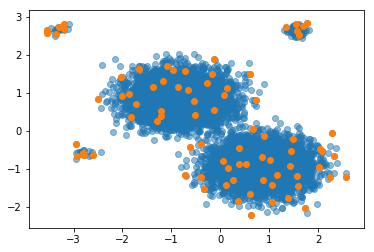

In [2]:
X = np.genfromtxt('../Data/ToyData.csv', delimiter=',')

N = X.shape[0]

sigma = 1
gamma = 1/(2*sigma**2) #exp(-gamma * x^2)
lam = 1e-6
nbFF = 4000

start = time.time()

# Fourier features
rbf_feature = RBFSampler(gamma, nbFF)
B = rbf_feature.fit_transform(X)
Temp = np.dot(np.transpose(B),B)+ N*lam*np.eye(nbFF)

print('Factorizing the projector')
b = np.linalg.cholesky(Temp); # lower triangular bb' = Temp
F = np.linalg.solve(b,np.transpose(B))#F = b'\B'; # P = F'*F
X = None
Temp = None
B = None
b = None

epsilon = 1e-10;
c = 200*epsilon;
t = 0.
# RAS

result = RASPython(F,c,epsilon)

end = time.time()
print('timing')
print(end - start)


X = np.genfromtxt('../Data/ToyData.csv', delimiter=',')
plt.scatter(X[:,0], X[:,1],alpha=0.5)
plt.scatter(X[result,0], X[result,1])

plt.show()